In [1]:
import pandas as pd
import numpy as np

In [3]:
subway = pd.read_csv('subway_neighbor_df.csv')

#narrow down the data into one day
subway["Date"] = pd.to_datetime(subway["Datetime"], format="%Y-%m-%d %H:%M:%S").apply(lambda x: x.strftime("%Y-%m-%d"))
#aggregate the data
agg_functions = {
'Entries':'sum'
}

for column_name in subway.columns[8:-1]:
    agg_functions[column_name] = 'first'

grouped = subway.groupby(["Date", "Stop Name", "Line", "Neighborhood"])
result = grouped.agg(agg_functions).reset_index()
result = result.replace(np.nan, 0)

MemoryError: Unable to allocate 256. KiB for an array with shape (32768,) and data type int64

In [42]:
data.columns.tolist()

['Datetime',
 'Stop Name',
 'Line',
 'Neighborhood',
 'Entries',
 'Time',
 'Average_Flow',
 'Normalized_Flow',
 'Housing units',
 'Percent white',
 'Moderately rent-burdened households, moderate income',
 'Pre-foreclosure notice rate (per 1,000 1-4 family and condo properties)',
 'Median sales price per unit, condominium (2018$)',
 'Home purchase loans to LMI borrowers (% of home purchase loans)',
 'Refinance loan rate (per 1,000 properties)',
 'Single-person households',
 'Residential units within 12 mile of a subway station',
 'Racial diversity index']

In [14]:
Lines = data['Line'].unique() # List of unique lines

Xs = [] # Each X is a dictionary with column names and mean values
Ys = [] # There's only one Y in each station

for line in Lines:
    Stops = data[data['Line'] == line]['Stop Name'].unique()  # Stops for each line
    for stop in Stops:
        data_filtered = data[(data['Stop Name'] == stop) & (data['Line'] == line)]
        if not data_filtered.empty:
            # Convert mean values to a dictionary with column names
            X = data_filtered.iloc[:, 8:18].mean().to_dict()
            Xs.append(X)
            # No need to convert to list for a single value
            y = data_filtered.iloc[:, 6].mean()
            Ys.append(y)

# Creating DataFrame from the list of dictionaries, which will retain column names
Xs_matrix = pd.DataFrame(Xs)
Ys_column = pd.DataFrame(Ys)


In [32]:
data['Line'].unique()

array(['Canarsie', '6th Av - Culver', 'Jamaica', 'Lexington Av',
       'Broadway - 7Av', '8th Av - Fulton St', 'Astoria', 'Flushing',
       'Queens Blvd', 'Liberty Av', 'Queens - Archer', 'Rockaway',
       'Lenox - White Plains Rd', 'Concourse',
       '8th Av - Fulton St, Concourse', 'Jerome Av',
       'Jerome Av, Lenox - White Plains Rd', 'Broadway - Brighton',
       'Broadway - 7Av, Flushing, Lexington - Shuttle',
       'Broadway - Brighton, Canarsie',
       'Broadway, Manhattan Bridge, Jamaica',
       '8th Av - Fulton St, 8th Av - Fulton St', 'Broadway',
       'Clark St, Lexington Av', 'Clark St',
       '8th Av - Fulton St, 6th Av - Culver', 'Sea Beach', 'West End',
       'West End, Sea Beach', 'Crosstown', 'Queens Blvd, Crosstown',
       '63rd St', 'Dyre Av',
       'Lexington Av, Flushing, Lexington - Shuttle', '4th Av', 'Pelham',
       '4th Av, Broadway - Brighton', 'Eastern Pky', 'Second Av',
       'Franklin Shuttle', 'Sea Beach / West End / Culver / Brighton',
  

In [15]:
Xs_matrix

,Housing units,Percent white,"Moderately rent-burdened households, moderate income","Pre-foreclosure notice rate (per 1,000 1-4 family and condo properties)","Median sales price per unit, condominium (2018$)",Home purchase loans to LMI borrowers (% of home purchase loans),"Refinance loan rate (per 1,000 properties)",Single-person households,Residential units within 12 mile of a subway station,Racial diversity index
0,78557.0,31.0,38.1,11.4,1326500.0,31.8,7.2,46.4,85.5,0.71
1,78557.0,31.0,38.1,11.4,1326500.0,31.8,7.2,46.4,85.5,0.71
2,87668.0,72.2,42.3,5.8,2413920.0,1.5,9.2,47.5,100.0,0.45
3,87668.0,72.2,42.3,5.8,2413920.0,1.5,9.2,47.5,100.0,0.45
4,65828.0,3.9,10.0,110.3,308780.0,58.5,18.0,32.0,71.2,0.57
...,...,...,...,...,...,...,...,...,...,...
435,68927.0,50.1,9.9,36.5,463680.0,8.4,14.1,20.1,39.7,0.59
436,68927.0,50.1,9.9,36.5,463680.0,8.4,14.1,20.1,39.7,0.59
437,68927.0,50.1,9.9,36.5,463680.0,8.4,14.1,20.1,39.7,0.59
438,68927.0,50.1,9.9,36.5,463680.0,8.4,14.1,20.1,39.7,0.59


In [17]:
Ys_column.rename(columns={'0':'Average_flow'}, inplace=True)
Ys_column

,0
0,2058.808809
1,734.541892
2,339.389812
3,2624.074470
4,411.997358
...,...
435,437.221097
436,603.042601
437,304.734201
438,286.615851


In [33]:
from sklearn.model_selection import train_test_split
X = Xs_matrix
y = Ys_column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [34]:
from sklearn import tree
model = tree.DecisionTreeRegressor(max_depth=3)

model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [35]:
#Get the R-Square for the predicted vs actuals on the text sample
print("Training R-Square",model.score(X_train,y_train))
print("Testing R-Square",model.score(X_test,y_test))

Training R-Square 0.3975286020178088
Testing R-Square 0.2287363912719118


In [41]:
from sklearn.metrics import mean_squared_error

# Use the trained model to make predictions on the test set
y_pred = model.predict(X_test)
y_pred2 = model.predict(X_train)

# Calculate the Mean Squared Error (MSE) between the predicted values (y_pred) and the actual values (y_test)
mse = mean_squared_error(y_test, y_pred)
mse2 = mean_squared_error(y_train, y_pred2)
rmse = np.sqrt(mse)
rmse2 = np.sqrt(mse2)

print("Root Mean Squared Error (RMSE) on testing set:", rmse)
print("Root Mean Squared Error (RMSE) on training set:", rmse2)

Root Mean Squared Error (RMSE) on testing set: 937.4516781889145
Root Mean Squared Error (RMSE) on training set: 771.1788132990058


In [37]:
data[['Average_Flow']].describe()

,Average_Flow
count,4.589380e+06
mean,1.219527e+03
std,1.497225e+03
min,2.179503e+00
25%,2.794567e+02
50%,7.044490e+02
75%,1.537412e+03
max,1.635508e+04


In [38]:
feature_names = [key for key in X.columns ]
feature_names

['Housing units',
 'Percent white',
 'Moderately rent-burdened households, moderate income',
 'Pre-foreclosure notice rate (per 1,000 1-4 family and condo properties)',
 'Median sales price per unit, condominium (2018$)',
 'Home purchase loans to LMI borrowers (% of home purchase loans)',
 'Refinance loan rate (per 1,000 properties)',
 'Single-person households',
 'Residential units within 12 mile of a subway station',
 'Racial diversity index']

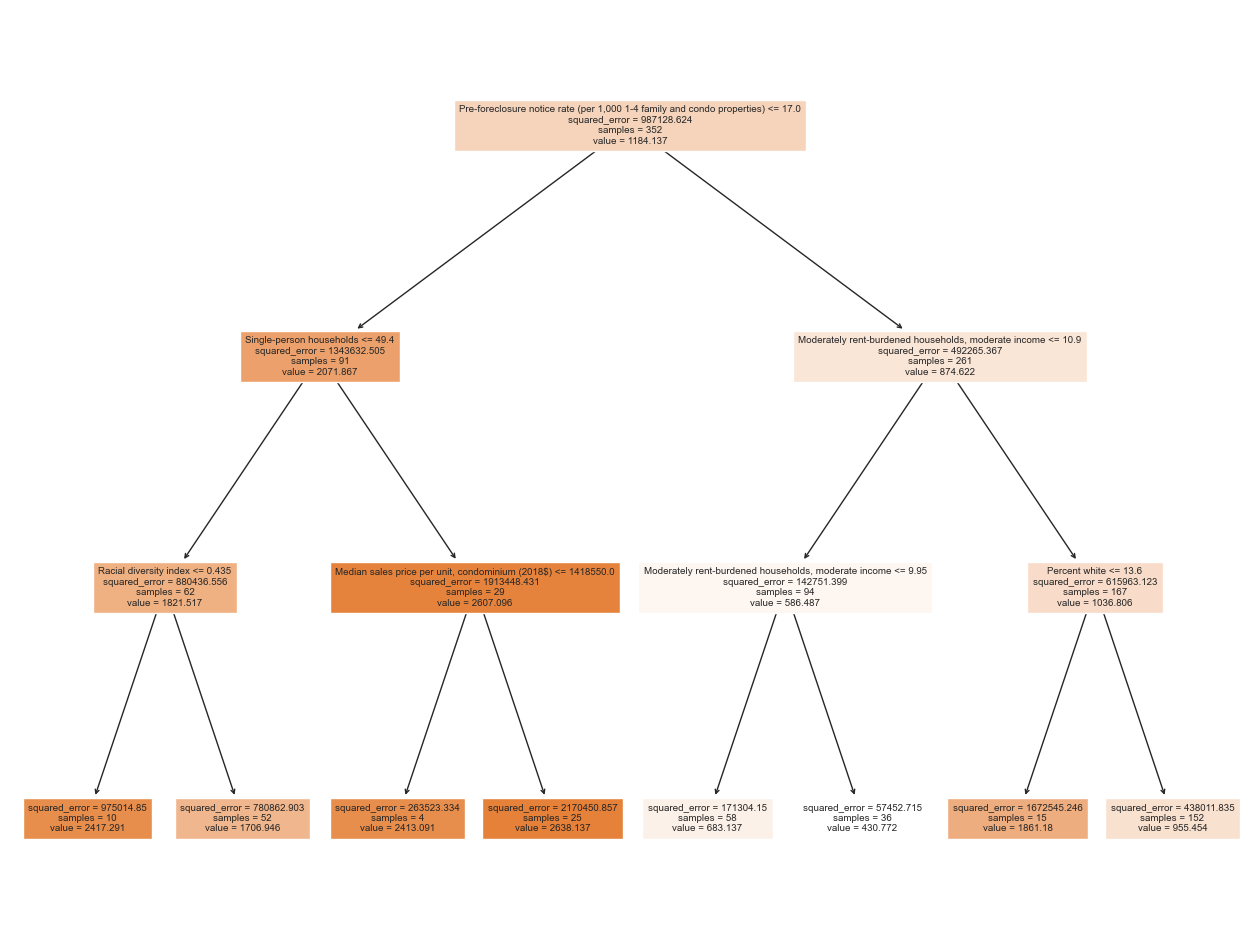

In [39]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(16,12)) 
plot_tree(model, feature_names=feature_names, filled=True, fontsize=7)
plt.show()

C:\Users\dota\AppData\Local\Temp\ipykernel_18020\1730738897.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  average_flow_mean = float(data[['Average_Flow']].mean())


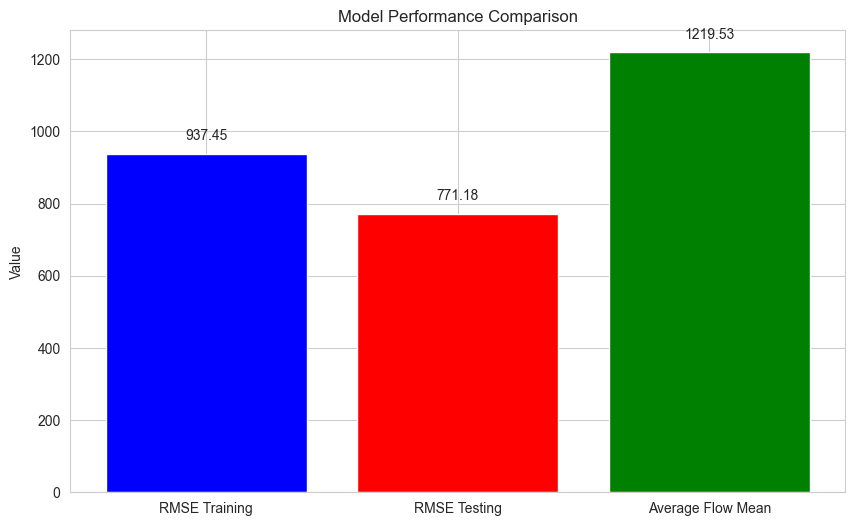

In [49]:
import matplotlib.pyplot as plt

# Given data
rmse_training = rmse
rmse_testing = rmse2
average_flow_mean = float(data[['Average_Flow']].mean())
# Labels for the bars
labels = ['RMSE Training', 'RMSE Testing', 'Average Flow Mean']

# Values corresponding to the labels
values = [rmse_training, rmse_testing, average_flow_mean]

# Creating the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, values, color=['blue', 'red', 'green'])

# Adding the title and labels
plt.title('Model Performance Comparison')
plt.ylabel('Value')

# Adding the value labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 30, round(yval, 2), ha='center', va='bottom')

# Show the plot
plt.show()

In [48]:
float(data[['Average_Flow']].mean())

C:\Users\dota\AppData\Local\Temp\ipykernel_18020\3628829222.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(data[['Average_Flow']].mean())


1219.5270363317043